In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [49]:
plt.rcParams['axes.facecolor'] = '#F5E1FF'  # Light purple background
plt.rcParams['figure.facecolor'] = '#F5E1FF'  # Light purple background

In [50]:
# Directory paths
static_dir = 'app/static'
graph_dir = os.path.join(static_dir, 'graphs')
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

# Save graphs function
def save_plot(fig, filename):
    fig.savefig(os.path.join(graph_dir, filename), bbox_inches='tight')

In [51]:
# Updated paths for loading CSV files
zomato_df = pd.read_csv('Zomato_data.csv')
swiggy_df = pd.read_csv('swiggy.csv')


In [52]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

zomato_df['rate'] = zomato_df['rate'].apply(handleRate)

In [53]:
zomato_short = zomato_df.head(10)
swiggy_short = swiggy_df.head(10)

In [54]:
zomato_avg_rating = zomato_short['rate'].mean()
swiggy_avg_rating = swiggy_short['Avg ratings'].mean()
zomato_total_ratings = zomato_short['votes'].sum()
swiggy_total_ratings = swiggy_short['Total ratings'].sum()

In [55]:
print(zomato_df.describe())
print(swiggy_df.describe())

             rate        votes  approx_cost(for two people)
count  148.000000   148.000000                   148.000000
mean     3.633108   264.810811                   418.243243
std      0.402271   653.676951                   223.085098
min      2.600000     0.000000                   100.000000
25%      3.300000     6.750000                   200.000000
50%      3.700000    43.500000                   400.000000
75%      3.900000   221.750000                   600.000000
max      4.600000  4884.000000                   950.000000
                  ID        Price  Avg ratings  Total ratings  Delivery time
count    8680.000000  8680.000000  8680.000000    8680.000000    8680.000000
mean   244812.071429   348.444470     3.655104     156.634793      53.967051
std    158671.617188   230.940074     0.647629     391.448014      14.292335
min       211.000000     0.000000     2.000000      20.000000      20.000000
25%     72664.000000   200.000000     2.900000      50.000000      44.00000

In [56]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

zomato_df['rate']=zomato_df['rate'].apply(handleRate)
print(zomato_df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


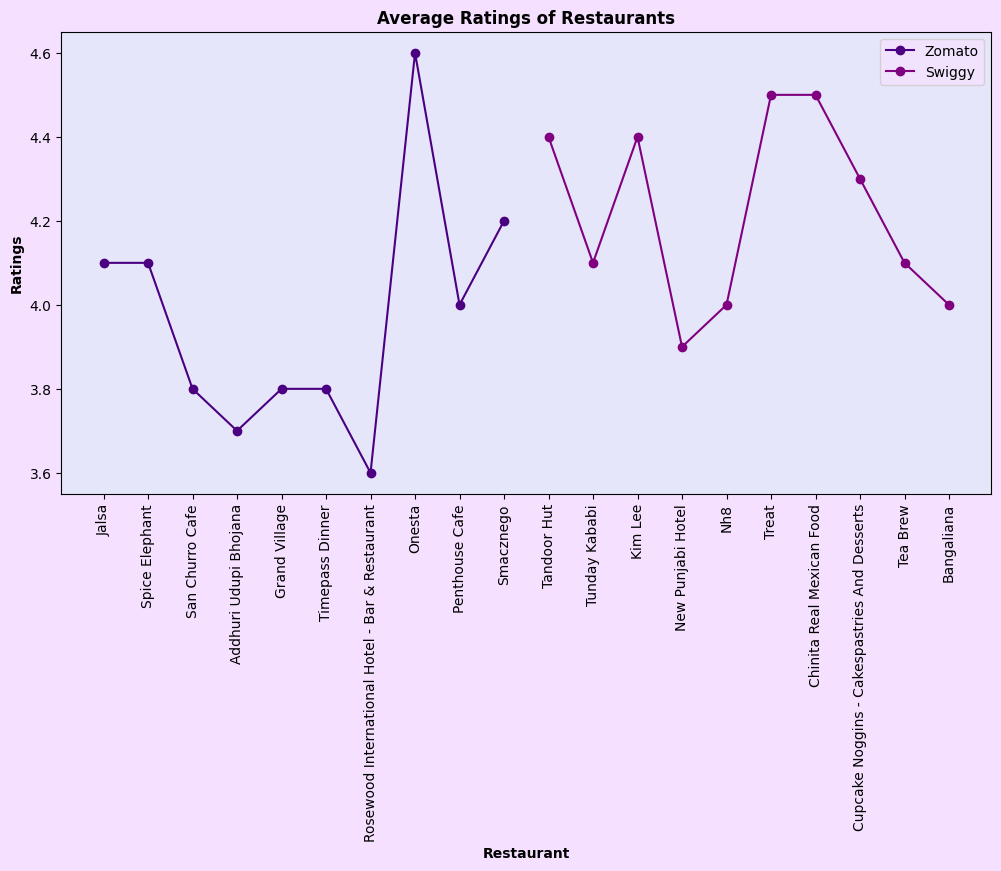

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(zomato_short['name'], zomato_short['rate'], label='Zomato', marker='o',c='indigo')
plt.plot(swiggy_short['Restaurant'], swiggy_short['Avg ratings'], label='Swiggy', marker='o',c='purple')
plt.xlabel('Restaurant',fontweight='bold')
plt.ylabel('Ratings',fontweight='bold')
plt.title('Average Ratings of Restaurants',fontweight='bold')
plt.legend()
plt.xticks(rotation=90)
plt.gca().set_facecolor('lavender') 
plt.savefig(os.path.join(graph_dir, 'average_ratings.png'))  # Save the plot
plt.show()
plt.close()



In [58]:
zomato_short = zomato_df.head(10)
swiggy_short = swiggy_df.head(10)

In [59]:
#who have higher avg rating comparison
zomato_avg_rating = zomato_short['rate'].mean()
swiggy_avg_rating = swiggy_short['Avg ratings'].mean()

#total rating comparison
zomato_total_ratings = zomato_short['votes'].sum()
swiggy_total_ratings = swiggy_short['Total ratings'].sum()

print(f"Zomato Average Rating: {zomato_avg_rating}")
print(f"Swiggy Average Rating: {swiggy_avg_rating}")
print(f"Zomato Total Ratings: {zomato_total_ratings}")
print(f"Swiggy Total Ratings: {swiggy_total_ratings}")

print("----------------------------------")

if zomato_avg_rating > swiggy_avg_rating:
    print("Zomato has a higher average rating.\n")
else:
    print("Swiggy has a higher average rating.\n")

if zomato_total_ratings > swiggy_total_ratings:
    print("Zomato is preferred more by customers based on total ratings.\n")
else:
    print("Swiggy is preferred more by customers based on total ratings.\n")

Zomato Average Rating: 3.97
Swiggy Average Rating: 4.220000000000001
Zomato Total Ratings: 6412
Swiggy Total Ratings: 2150
----------------------------------
Swiggy has a higher average rating.

Zomato is preferred more by customers based on total ratings.



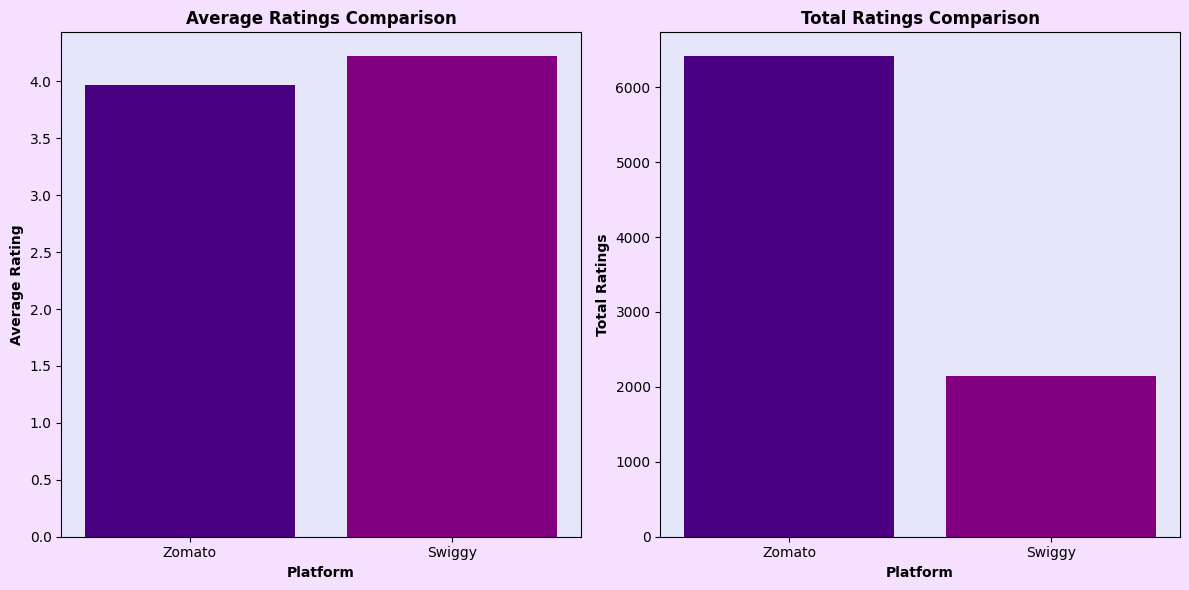

In [60]:
plt.figure(figsize=(12, 6))
labels = ['Zomato', 'Swiggy']
avg_ratings = [zomato_avg_rating, swiggy_avg_rating]
total_ratings = [zomato_total_ratings, swiggy_total_ratings]
x = range(len(labels))

plt.subplot(1, 2, 1)
plt.bar(x, avg_ratings, color=['indigo', 'purple'])
plt.xticks(x, labels)
plt.xlabel('Platform', fontweight='bold')
plt.ylabel('Average Rating', fontweight='bold')
plt.title('Average Ratings Comparison', fontweight='bold')
plt.gca().set_facecolor('lavender') 

plt.subplot(1, 2, 2)
plt.bar(x, total_ratings, color=['indigo', 'purple'])
plt.xticks(x, labels)
plt.xlabel('Platform', fontweight='bold')
plt.ylabel('Total Ratings', fontweight='bold')
plt.title('Total Ratings Comparison', fontweight='bold')
plt.gca().set_facecolor('lavender') 

plt.tight_layout()
plt.savefig(os.path.join(graph_dir, 'ratings_comparison.png'))  # Save the plot
plt.show()
plt.close()

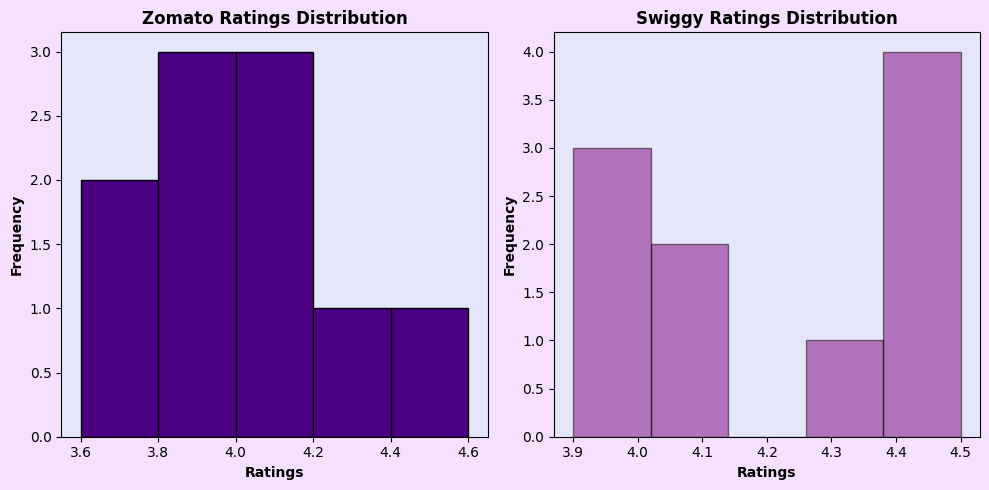

In [61]:
import matplotlib.pyplot as plt

# Plotting Zomato's ratings distribution
plt.figure(figsize=(10, 5))  # Adjust figsize as needed
plt.subplot(1, 2, 1)  # Create subplot 1 out of 2
plt.hist(zomato_short['rate'], bins=5, edgecolor='black', color='indigo')
plt.xlabel('Ratings', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Zomato Ratings Distribution', fontweight='bold')
plt.gca().set_facecolor('lavender') 

# Plotting Swiggy's ratings distribution
plt.subplot(1, 2, 2)  # Create subplot 2 out of 2
plt.hist(swiggy_short['Avg ratings'], bins=5, edgecolor='black', color='purple', alpha=0.5)
plt.xlabel('Ratings', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Swiggy Ratings Distribution', fontweight='bold')
plt.gca().set_facecolor('lavender') 

plt.tight_layout()  # Adjust subplot parameters to give specified padding 
plt.savefig(os.path.join(graph_dir, 'ratings_distribution.png'))  # Save the plot
plt.show()
plt.close()


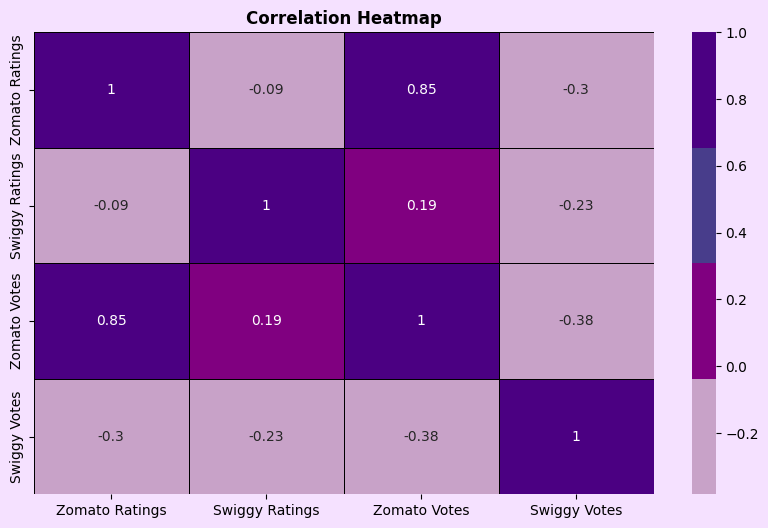

In [62]:
combined_df = pd.DataFrame({
    'Zomato Ratings': zomato_short['rate'],
    'Swiggy Ratings': swiggy_short['Avg ratings'],
    'Zomato Votes': zomato_short['votes'],
    'Swiggy Votes': swiggy_short['Total ratings']
})

# Define colors

color_lilac = '#C8A2C8'
color_purple = '#800080'
color_dark_purple = '#483D8B'
color_indigo = '#4B0082'

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.corr(), annot=True, cmap=sns.color_palette([ color_lilac, color_purple, color_dark_purple, color_indigo]), linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap', fontweight='bold')
plt.gca().set_facecolor('lavender')  # Set background color
plt.savefig(os.path.join(graph_dir, 'correlation_heatmap.png'))  # Save the plot
plt.show()
plt.close()

              Restaurant Platform  Cost for One Person
0                  Jalsa   Zomato                400.0
1         Spice Elephant   Zomato                400.0
2        San Churro Cafe   Zomato                400.0
3  Addhuri Udupi Bhojana   Zomato                150.0
4          Grand Village   Zomato                300.0
5            Tandoor Hut   Swiggy                300.0
6          Tunday Kababi   Swiggy                300.0
7                Kim Lee   Swiggy                650.0
8      New Punjabi Hotel   Swiggy                250.0
9                    Nh8   Swiggy                350.0
Average Cost for One Person:  Platform
Swiggy    370.0
Zomato    330.0
Name: Cost for One Person, dtype: float64


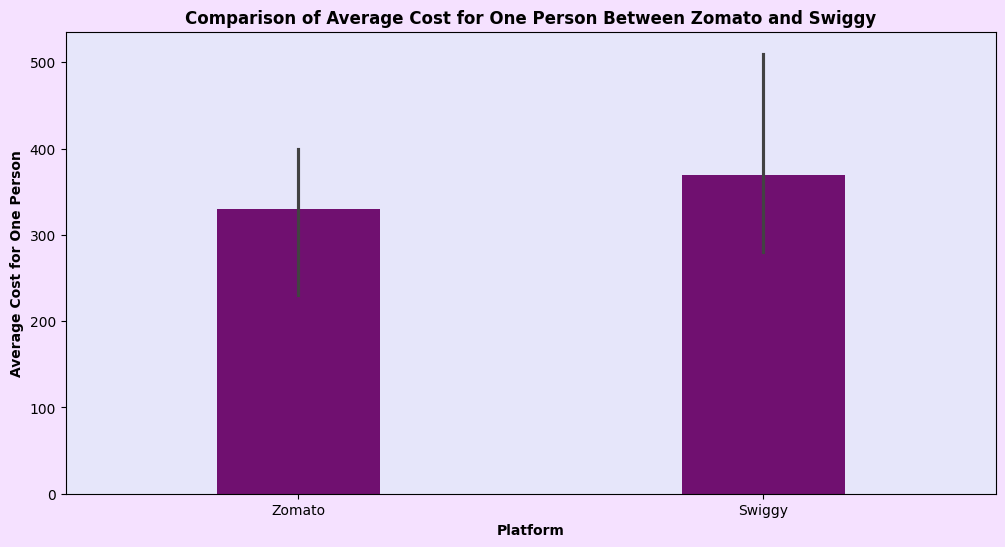

In [63]:
#zomato cost for one person
zomato_df['approx_cost(for one person)'] = zomato_df['approx_cost(for two people)'] / 2

zomato_short = zomato_df.head()
swiggy_short = swiggy_df.head()

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Restaurant': zomato_short['name'].tolist() + swiggy_short['Restaurant'].tolist(),
    'Platform': ['Zomato']*5 + ['Swiggy']*5,
    'Cost for One Person': zomato_short['approx_cost(for one person)'].tolist() + swiggy_short['Price'].tolist()
})
print(comparison_df)
avg_cost = comparison_df.groupby('Platform')['Cost for One Person'].mean()
print("Average Cost for One Person: ",avg_cost)

plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Cost for One Person', data=comparison_df, estimator=lambda x: sum(x) / len(x),width=0.35,color='purple')
plt.xlabel('Platform', fontweight='bold')
plt.ylabel('Average Cost for One Person', fontweight='bold')
plt.title('Comparison of Average Cost for One Person Between Zomato and Swiggy', fontweight='bold')
plt.gca().set_facecolor('lavender') 
plt.savefig(os.path.join(graph_dir, 'cost_comparison.png'))  # Save the plot
plt.show()
plt.close()




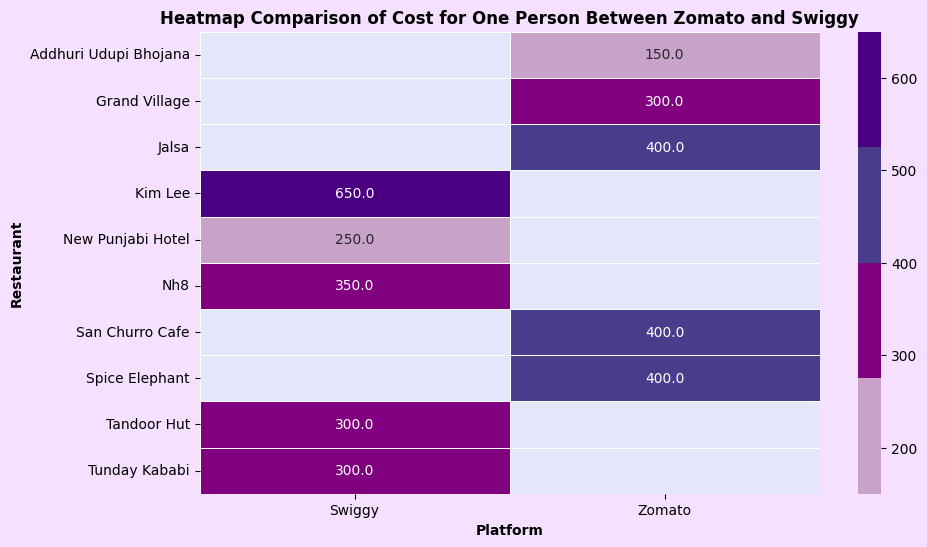

In [64]:
# Define colors
color_dark_purple = '#483D8B'
color_lilac = '#C8A2C8'
color_purple = '#800080'
color_indigo = '#4B0082'
color_lavender = '#E6E6FA'

# Prepare heatmap data
heatmap_data = comparison_df.pivot(index='Restaurant', columns='Platform', values='Cost for One Person')

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap=sns.color_palette([color_lilac, color_purple, color_dark_purple, color_indigo]), fmt=".1f", linewidths=.5)
plt.title('Heatmap Comparison of Cost for One Person Between Zomato and Swiggy', fontweight='bold')
plt.ylabel('Restaurant', fontweight='bold')
plt.xlabel('Platform', fontweight='bold')
plt.gca().set_facecolor(color_lavender)  # Set background color to lavender
plt.savefig(os.path.join(graph_dir, 'cost_comparison_HM.png'))  # Save the plot
plt.show()
plt.close()

In [65]:
# Store the results in a dictionary
results = {
    'zomato_avg_rating': zomato_avg_rating,
    'swiggy_avg_rating': swiggy_avg_rating,
    'zomato_total_ratings': zomato_total_ratings,
    'swiggy_total_ratings': swiggy_total_ratings,
    'avg_cost': avg_cost.to_dict(),
    'plots': ['average_ratings.png','ratings_comparison.png', 'ratings_distribution.png', 'correlation_heatmap.png', 'cost_comparison.png','cost_comparison_HM.png']
}

In [66]:
with open('./data_pkl/myproj1.pkl', 'wb') as f:
    pickle.dump(results, f)

In [67]:
#Hyperparameter Tuning--> Grid Search, Random Search, Bayesian Optimization
#Ensemble Methods--> Random Forest, Gradient Boosting,  Stacking

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def handle_rate(value):
    return float(str(value).split('/')[0])

zomato_df['rate'] = zomato_df['rate'].apply(handle_rate)

numeric_columns = zomato_df.select_dtypes(include=np.number).columns
zomato_df[numeric_columns] = zomato_df[numeric_columns].fillna(zomato_df[numeric_columns].mean())

zomato_df = pd.get_dummies(zomato_df, drop_first=True)

X_zomato = zomato_df.drop('rate', axis=1)
y_zomato = zomato_df['rate']
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(X_zomato, y_zomato, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}
rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_z, y_train_z)

test_score = grid_search.score(X_test_z, y_test_z)

rf_model_best = grid_search.best_estimator_
rf_model_best.fit(X_train_z, y_train_z)
rf_accuracy = rf_model_best.score(X_test_z, y_test_z)

gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_z, y_train_z)
gb_accuracy = gb_model.score(X_test_z, y_test_z)

base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeRegressor(random_state=42))
]

meta_learner = LinearRegression()

stack_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner, cv=5)
stack_model.fit(X_train_z, y_train_z)
stack_accuracy = stack_model.score(X_test_z, y_test_z)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\shaya\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shaya\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shaya\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\shaya\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", 

In [68]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
print(f"Test score: {test_score}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(f"Stacking Accuracy: {stack_accuracy}")

Best parameters: {'max_depth': 30, 'max_features': 'log2', 'n_estimators': 200}
Best score: 0.40412617897609693
Test score: 0.13312193259869254
Random Forest Accuracy: 0.18069014080675339
Gradient Boosting Accuracy: 0.22070105743673585
Stacking Accuracy: 0.23451081194421997


In [69]:
comparison_df = pd.DataFrame({
    'Restaurant': zomato_short['name'].tolist() + swiggy_short['Restaurant'].tolist(),
    'Platform': ['Zomato']*5 + ['Swiggy']*5,
    'Cost for One Person': zomato_short['approx_cost(for one person)'].tolist() + swiggy_short['Price'].tolist()
})
avg_cost = comparison_df.groupby('Platform')['Cost for One Person'].mean()




In [70]:
import os
import pickle

# Create a directory if it doesn't exist
directory = 'data_pkl'
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the results to a pickle file
file_path = os.path.join(directory, 'myproj1.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(results, f)
